# Iris Data Analysis with Decision Tree :
Use the Iris dataset (a classic dataset for classification) and build a
Decision Tree model to classify flower species based on their features.

In [1]:
#Step 1: Import Libraries and Load Data
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [2]:
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
#Step 2: Train Decision Tree Model
# Create and train the model

dtm = DecisionTreeClassifier(random_state=42)
dtm.fit(X_train, y_train)

y_pred = dtm.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [4]:
#Step 3: Predict on a New Case
#New case: Sepal length=5.1, Sepal width=3.5, Petal length=1.4, Petal width=0.2

new_case = np.array([[5.1, 3.5, 1.4, 0.2]])

# Apply same scaling
new_case_scaled = scaler.transform(new_case)

# Predict
predicted_class = dtm.predict(new_case_scaled)
predicted_label = iris.target_names[predicted_class[0]]

print(f"The predicted class for the new sample is: {predicted_label}")

The predicted class for the new sample is: setosa


# Deploy Model

In [5]:
#Save model
import pickle

In [6]:
#save the trained model into .pkl
filename = 'dtm_trained_model.pkl'
pickle.dump(dtm, open(filename, 'wb'))

In [7]:
#load the saved model
loaded_model = pickle.load(open('dtm_trained_model.pkl', 'rb'))

In [8]:
#try to use loaded_model
new_case = np.array([[5.1, 3.5, 1.4, 0.2]])

# Apply same scaling
new_case_scaled = scaler.transform(new_case)

# Predict
predicted_class = loaded_model.predict(new_case_scaled)
predicted_label = iris.target_names[predicted_class[0]]

print(f"The predicted class for the new sample is: {predicted_label}")

The predicted class for the new sample is: setosa


# A pre-trained neural network (like MobileNetV2) to perform image classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import io
import pickle

# Load the pre-trained model
model = MobileNetV2(weights="imagenet")

#save the pre-trained model into .pkl
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

#load model
loaded_model = pickle.load(open('model.pkl', 'rb'))

# File uploader
from google.colab import files
uploaded_file = files.upload("Upload an image (.jpg, .jpeg, .png)...")

if uploaded_file is not None:
    # Get the first uploaded file's content
    file_name = list(uploaded_file.keys())[0]
    file_content = uploaded_file[file_name]

    # Open the image using BytesIO
    img = Image.open(io.BytesIO(file_content))

    # Preprocess the image
    img = img.resize((224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Prediction
    preds = loaded_model.predict(x)
    top_preds = decode_predictions(preds, top=3)[0]

    # Display predictions
    print("Predictions:")
    for i, pred in enumerate(top_preds):
        print(f"{i+1}. **{pred[1]}** — {round(pred[2]*100, 2)}%")


Saving หนุ่ย.jpg to Upload an image.../หนุ่ย.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions:
1. **tusker** — 70.55999755859375%
2. **Indian_elephant** — 15.220000267028809%
3. **African_elephant** — 1.899999976158142%


# K-Mean Clustering

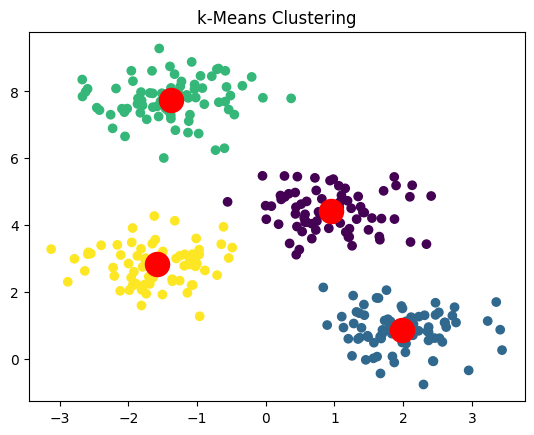

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply k-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('k-Means Clustering')
plt.show()

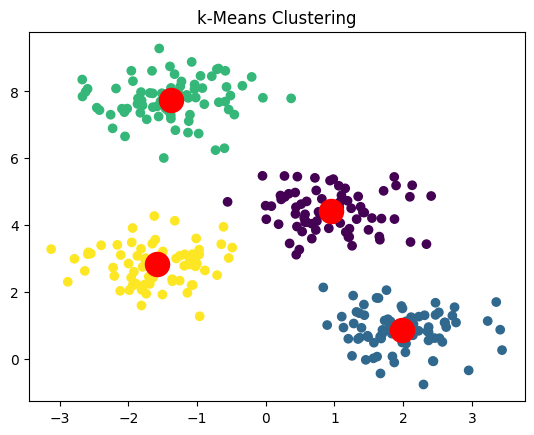

In [ ]:
import pickle

#save the trained model into .pkl
filename = 'kmeans_model.pkl'
pickle.dump(kmeans, open(filename, 'wb'))

#load the saved model
loaded_model = pickle.load(open('kmeans_model.pkl', 'rb'))

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(loaded_model.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('k-Means Clustering')
plt.show()